# WITH PANDAS AND MATPLOTLIB

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [ ]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 1: Plot number of people by gender

In [ ]:
a = kill.gender.value_counts()
a

M    2428
F     107
Name: gender, dtype: int64

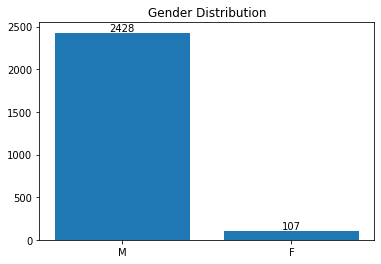

In [ ]:
fig, ax= plt.subplots()

plt.title("Gender Distribution")
for i in range(len(a.index)):
    plt.annotate(str(a[i]), xy=(a.index[i],a[i]), ha='center', va='bottom')

ax.bar(a.index, a)
plt.show()

## 2: Plot 7 most common kill weapons

In [ ]:
armed_num = kill.armed.value_counts().head(7)
armed_num

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

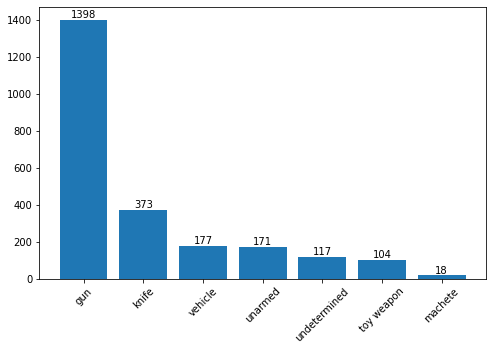

In [ ]:
# with matplotlib
fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(armed_num.index)):
  plt.annotate(str(armed_num[i]), xy=(armed_num.index[i],armed_num[i]), ha='center', va='bottom')

armed_num_pos = range(len(armed_num.index))
plt.xticks(armed_num_pos, armed_num.index, rotation=45)

ax.bar(armed_num.index, armed_num)


plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [ ]:
above_25_index = kill[kill['age'] > 25.0].index

In [ ]:
under_25_index = kill[kill['age'] <= 25.0].index

In [ ]:
kill.age.isnull().value_counts()

False    2458
True       77
Name: age, dtype: int64

In [ ]:
null_index = kill[kill.age.isnull()].index

In [ ]:
kill.loc[under_25_index, 'age_cat'] = "below25"
kill.loc[above_25_index, 'age_cat'] = "above25"
kill.loc[null_index, 'age_cat'] = "below25"

In [ ]:
kill_agecat = kill.age_cat.value_counts()
kill_agecat

above25    1905
below25     630
Name: age_cat, dtype: int64

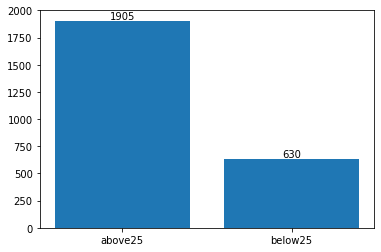

In [ ]:
# with matplotlib
fig, ax = plt.subplots()

for i in range(len(kill_agecat.index)):
  plt.annotate(str(kill_agecat[i]), xy = (kill_agecat.index[i], kill_agecat[i]), ha = "center", va = "bottom")

ax.bar(kill_agecat.index, kill_agecat)

plt.show()

## 4: Plot number of killed poeple by race

In [ ]:
NOK_r = kill.race.value_counts()
NOK_r

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

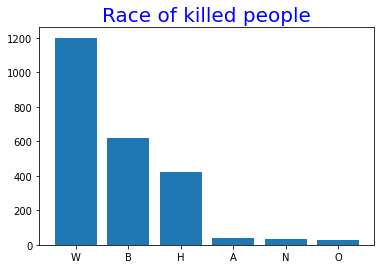

In [ ]:
# with matplotlib
fig, ax = plt.subplots()

ax.bar(NOK_r.index, NOK_r)
plt.title("Race of killed people", color="b", fontsize=20)

plt.show()

## 5: Killed People According to Races (Pie Chart)

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
race_of = kill.race.unique()
race_of

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [ ]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [ ]:
kill.dropna(inplace=True)

In [ ]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [ ]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [ ]:
race_index = kill.race.value_counts().index
race_index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [ ]:
race_array = np.array(kill.race.value_counts())
race_array

array([1168,  592,  401,   36,   29,   28])

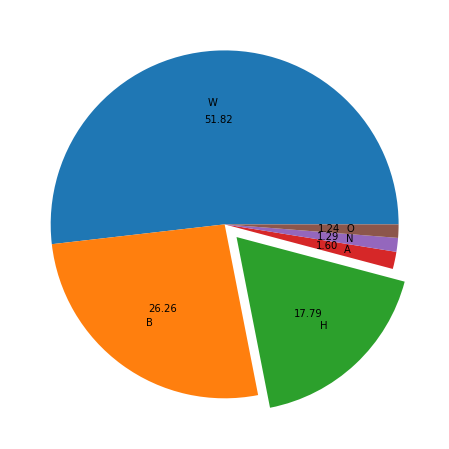

In [ ]:
# matplotlib
plt.figure(figsize=(10, 8))

myexplode = [0, 0, 0.1, 0, 0, 0]

plt.pie(race_array, labels = race_index, explode = myexplode, labeldistance = 0.7, autopct="%.2f")

plt.show()